# Visualizations/Analysis for SVM model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import pickle
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
import seaborn as sns
sys.path.append(os.path.dirname(os.path.abspath("./aml/src/prep/utils.py")))
import utils

In [3]:
# Read CSV file with preprocessed reviews into a DataFrame
path = '../data/processed_reviews.csv'
proc_reviews = pd.read_csv(path)
proc_reviews = proc_reviews[proc_reviews['CleanedText'].notna()]

In [4]:
# Path to vectorizer
path_vectorizer = '../data/vectorizers/tfidf_vect_min_df_1_ngram_range_1_3.pkl'

# Path to model metrics
path_metrics_folder = '../data/model_tfidf_random_state_42_tol_0.0001_class_weight_balanced/'

In [5]:
proc_reviews.head()

,ProductId,UserId,Time,SentimentPolarity,Class_Labels,Sentiment,Score,Usefulness,CleanedText
0,B001E4KFG0,A3SGXH7AUHU8GW,2011-04-27,Positive,1,positive,5,>75%,bought sever vital can dog food product found ...
1,B00813GRG4,A1D87F6ZCVE5NK,2012-09-07,Negative,0,negative,1,useless,product arriv label jumbo salt peanut peanut a...
2,B000LQOCH0,ABXLMWJIXXAIN,2008-08-18,Positive,1,positive,4,>75%,confect around centuri light pillowi citrus ge...
3,B000UA0QIQ,A395BORC6FGVXV,2011-06-13,Negative,0,negative,2,>75%,look secret ingredi robitussin believ found go...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,2012-10-21,Positive,1,positive,5,useless,great taffi great price wide assort yummi taff...


In [6]:
data_train, data_val_test, Y_train, Y_val_test = train_test_split(
    proc_reviews, proc_reviews['Score'], test_size=0.3, random_state=42, stratify=proc_reviews['Score']
)

In [7]:
data_val, data_test, Y_val, Y_test = train_test_split(
    data_val_test, Y_val_test, test_size=0.333, random_state=42, stratify=data_val_test['Score']
)

In [8]:
# Double check stratification is ok over the three splits

all_counter = Counter(list(proc_reviews['Score']))
train_counter = Counter(list(Y_train))
val_counter = Counter(list(Y_val))
test_counter = Counter(list(Y_test))

num_all = len(list(proc_reviews['Score']))
num_train = len(list(Y_train))
num_val = len(list(Y_val))
num_test = len(list(Y_test))

all_by_class = {5: all_counter[5]/num_all,
                4: all_counter[4]/num_all,
                3: all_counter[3]/num_all,
                2: all_counter[2]/num_all,
                1: all_counter[1]/num_all
                }

train_by_class = {5: train_counter[5]/num_all,
                4: train_counter[4]/num_all,
                3: train_counter[3]/num_all,
                2: train_counter[2]/num_all,
                1: train_counter[1]/num_all
                }

val_by_class = {5: val_counter[5]/num_all,
                4: val_counter[4]/num_all,
                3: val_counter[3]/num_all,
                2: val_counter[2]/num_all,
                1: val_counter[1]/num_all
                }

test_by_class = {5: test_counter[5]/num_all,
                4: test_counter[4]/num_all,
                3: test_counter[3]/num_all,
                2: test_counter[2]/num_all,
                1: test_counter[1]/num_all
                }

print(f"overall fractions = 5: {all_by_class[5]*100:.2f}% - 4: {all_by_class[4]*100:.2f}% - 3: {all_by_class[3]*100:.2f}% - 2: {all_by_class[2]*100:.2f}% - 1: {all_by_class[1]*100:.2f}%")
print(f"train fractions = 5: {train_by_class[5]*100:.2f}% - 4: {train_by_class[4]*100:.2f}% - 3: {train_by_class[3]*100:.2f}% - 2: {train_by_class[2]*100:.2f}% - 1: {train_by_class[1]*100:.2f}%")
print(f"val fractions = 5: {val_by_class[5]*100:.2f}% - 4: {val_by_class[4]*100:.2f}% - 3: {val_by_class[3]*100:.2f}% - 2: {val_by_class[2]*100:.2f}% - 1:{val_by_class[1]*100:.2f}%")
print(f"test fractions = 5: {test_by_class[5]*100:.2f}% - 4: {test_by_class[4]*100:.2f}% - 3: {test_by_class[3]*100:.2f}% - 2: {test_by_class[2]*100:.2f}% - 1:{test_by_class[1]*100:.2f}%")


overall fractions = 5: 63.71% - 4: 14.24% - 3: 7.56% - 2: 5.28% - 1: 9.22%
train fractions = 5: 44.59% - 4: 9.97% - 3: 5.29% - 2: 3.70% - 1: 6.45%
val fractions = 5: 12.75% - 4: 2.85% - 3: 1.51% - 2: 1.06% - 1:1.84%
test fractions = 5: 6.36% - 4: 1.42% - 3: 0.76% - 2: 0.53% - 1:0.92%


In [9]:
def make_dict_keys_str(_dic):

    new_dic = {}

    for key in _dic.keys():
        new_dic[str(key)] = _dic[key]

    return new_dic

In [10]:
# Save CSV with class distribution

class_dist = pd.DataFrame.from_dict([make_dict_keys_str(all_by_class)]).transpose()
class_dist = class_dist.rename(columns={0:'fraction'})

train_class_dist = pd.DataFrame.from_dict([make_dict_keys_str(all_by_class)]).transpose()
train_class_dist = class_dist.rename(columns={0:'fraction'})

test_class_dist = pd.DataFrame.from_dict([make_dict_keys_str(test_by_class)]).transpose()
test_class_dist = class_dist.rename(columns={0:'fraction'})

## Data class distribution

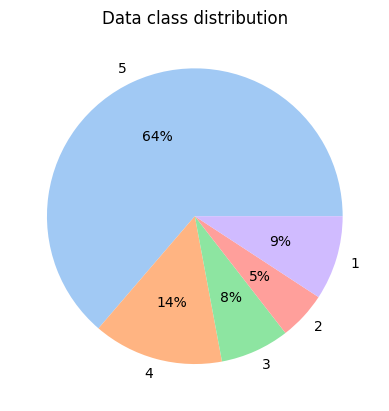

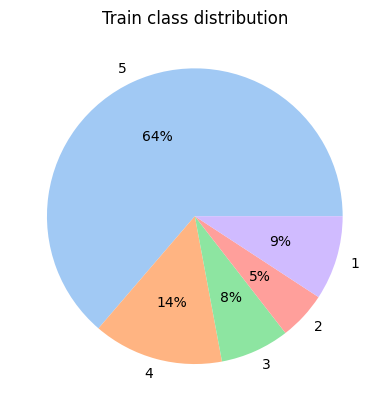

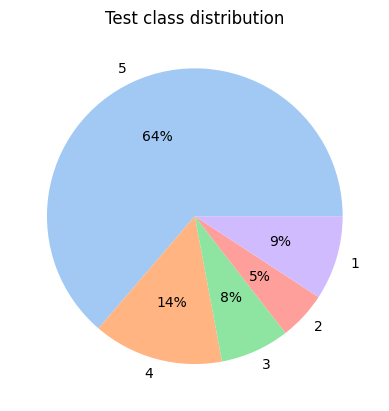

In [11]:
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.title("Data class distribution")
plt.pie(list(class_dist['fraction']), labels = list(class_dist.index), colors = colors, autopct='%.0f%%')
plt.show()

plt.title("Train class distribution")
plt.pie(list(train_class_dist['fraction']), labels = list(class_dist.index), colors = colors, autopct='%.0f%%')
plt.show()

plt.title("Test class distribution")
plt.pie(list(test_class_dist['fraction']), labels = list(class_dist.index), colors = colors, autopct='%.0f%%')
plt.show()

## Classification confusion matrix

In [12]:
path_metrics_folder.split("/")[-2]

'model_tfidf_random_state_42_tol_0.0001_class_weight_balanced'

In [13]:
# Load confusion matrix
confusion_m_test_path = path_metrics_folder + "confusion_matrix_test.pkl"

with open(confusion_m_test_path, 'rb') as f:
    confusion_m_test = pickle.load(f)

In [14]:
# Plot confusion matrix
def plot_confusion_matrix(conf_m, title_str):

    group_counts = ['{0:0.0f}'.format(value) for value in
                conf_m.flatten()]
    
    group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_m.flatten()/np.sum(conf_m)]
    
    labels = [f'{v1}\n{v2}' for v1, v2 in
            zip(group_counts,group_percentages)]
    
    labels = np.asarray(labels).reshape(5,5)
    
    sns.heatmap(conf_m, annot=labels, fmt='', cmap='Blues')

    plt.title(title_str)

    plt.ylabel('True class')
    plt.xlabel('Predicted class')

    return

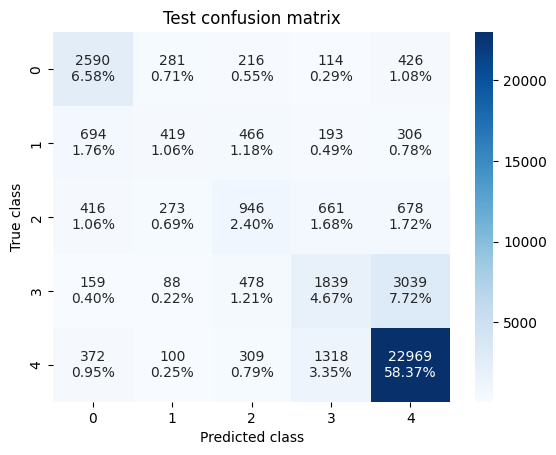

In [15]:
plot_confusion_matrix(confusion_m_test, "Test confusion matrix")

## t-SNE 

In [16]:
from utils import extract_2tfidf_vecs

In [17]:
# Load vectorizer
with open(path_vectorizer, 'rb') as f:
    vect = pickle.load(f)

In [18]:
# Get embeddings
X_train, X_val, X_test = extract_2tfidf_vecs(data_train['CleanedText'], data_val['CleanedText'], data_test['CleanedText'], vect)

In [19]:
X_train.shape

(275718, 10161625)

In [20]:
from sklearn.manifold import TSNE

In [21]:
type(X_test)

scipy.sparse._csr.csr_matrix

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2, svd_solver = "arpack")
X_pca = pca.fit_transform(X_test)

In [24]:
type(X_pca)

numpy.ndarray

In [25]:
X_pca.shape

(39350, 2)

In [26]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


In [27]:
df_pca

,PC1,PC2
0,0.004798,-0.004180
1,-0.013262,-0.001987
2,0.001106,-0.003531
3,-0.004879,-0.001005
4,-0.070480,0.003313
...,...,...
39345,-0.064052,0.000483
39346,-0.028080,-0.006998
39347,-0.012104,-0.001817
39348,-0.017638,-0.001513


<Axes: xlabel='PC1', ylabel='PC2'>

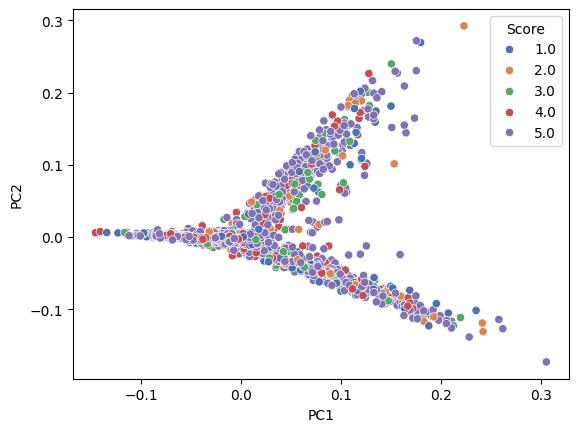

In [28]:
sns.scatterplot(x="PC1",y="PC2",hue=Y_test,data=df_pca, palette="deep")

In [29]:
 # We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components, init="random")
tsne_result = tsne.fit_transform(X_pca)
tsne_result.shape
 
# Plot the result of our TSNE with the label color coded
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': Y_test})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=20, palette="deep")
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


In [ ]:
 # We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components, init="random")
tsne_result = tsne.fit_transform(X_test)
tsne_result.shape
 
# Plot the result of our TSNE with the label color coded
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': Y_test})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=20, palette="deep")
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


KeyboardInterrupt: 